In [8]:
from google.colab import files
uploaded = files.upload()


Saving data.csv to data (1).csv


In [9]:
import pandas as pd

df = pd.read_csv("data.csv")

df.head()


,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,...,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Adrian Yanez,Gustavo Lopez,Chris Tognoni,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Bantamweight,0.000,0.0,...,0,1,0,0,Orthodox,170.18,177.80,135.0,31.0,27.0
1,Trevin Giles,Roman Dolidze,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Middleweight,0.500,0.0,...,0,3,0,0,Orthodox,182.88,187.96,185.0,32.0,28.0
2,Tai Tuivasa,Harry Hunsucker,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Heavyweight,NaN,NaN,...,1,3,0,0,Southpaw,187.96,190.50,264.0,32.0,28.0
3,Cheyanne Buys,Montserrat Conejo,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenStrawweight,NaN,NaN,...,0,0,0,0,Switch,160.02,160.02,115.0,28.0,25.0
4,Marion Reneau,Macy Chiasson,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenBantamweight,0.125,0.0,...,1,2,2,0,Orthodox,167.64,172.72,135.0,29.0,43.0


In [10]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# 🧾 First, let's take a look at what columns we have in the dataset.
# This helps us understand what kind of information we can work with.
print("Columns in the dataset:")
print(df.columns.tolist())

# 🧠 I manually selected a subset of features that I think might be useful for predicting the outcome.
# These include fighter attributes like age, height, reach, and weight, plus some performance stats.
selected_columns = [
    'R_age', 'B_age',
    'R_Height_cms', 'B_Height_cms',
    'R_Reach_cms', 'B_Reach_cms',
    'R_Weight_lbs', 'B_Weight_lbs',
    'R_avg_KD', 'B_avg_KD',
    'R_avg_opp_KD', 'B_avg_opp_KD',
    'title_bout',
    'weight_class',
    'Winner'  # this is the original label we'll convert to binary
]

# 📦 Now we create a new DataFrame with only the selected columns.
# This keeps things clean and focused.
df_clean = df[selected_columns].copy()

# 🎯 Let's create a binary target column.
# I map 'Red' to 1, 'Blue' to 0, and remove anything else (like 'Draw' or NaN).
df_clean['Target'] = df_clean['Winner'].apply(
    lambda x: 1 if isinstance(x, str) and x.strip().lower() == 'red'
    else 0 if isinstance(x, str) and x.strip().lower() == 'blue'
    else np.nan
)

# 🧹 Drop rows where the result isn't Red or Blue (e.g. Draws or missing labels)
df_clean = df_clean.dropna(subset=['Target'])

# 🗑️ We no longer need the original text column
df_clean = df_clean.drop(columns=['Winner'])

# 🔎 Let's see if we still have any missing values left
print("Missing values in each column:")
print(df_clean.isna().sum())

# 👇 If there are still NaNs (like missing height or age), we drop those rows for now.
# (Could also impute later, but keeping it simple here.)
df_clean = df_clean.dropna()

# ✅ Final preview of our cleaned and ready-to-use dataset:
print("Preview of the cleaned DataFrame:")
print(df_clean.head())

# 🎯 Separate features and target
X = df_clean.drop(columns=['Target'])
y = df_clean['Target']

# 🎨 One-hot encode the 'weight_class' column
# This turns weight class (a text column) into multiple binary columns.
# I used drop_first=True to avoid the dummy variable trap (multicollinearity).
X = pd.get_dummies(X, columns=['weight_class'], drop_first=True)

# 🧪 Train-test split: I kept 80% of the data for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


Columns in the dataset:
['R_fighter', 'B_fighter', 'Referee', 'date', 'location', 'Winner', 'title_bout', 'weight_class', 'B_avg_KD', 'B_avg_opp_KD', 'B_avg_SIG_STR_pct', 'B_avg_opp_SIG_STR_pct', 'B_avg_TD_pct', 'B_avg_opp_TD_pct', 'B_avg_SUB_ATT', 'B_avg_opp_SUB_ATT', 'B_avg_REV', 'B_avg_opp_REV', 'B_avg_SIG_STR_att', 'B_avg_SIG_STR_landed', 'B_avg_opp_SIG_STR_att', 'B_avg_opp_SIG_STR_landed', 'B_avg_TOTAL_STR_att', 'B_avg_TOTAL_STR_landed', 'B_avg_opp_TOTAL_STR_att', 'B_avg_opp_TOTAL_STR_landed', 'B_avg_TD_att', 'B_avg_TD_landed', 'B_avg_opp_TD_att', 'B_avg_opp_TD_landed', 'B_avg_HEAD_att', 'B_avg_HEAD_landed', 'B_avg_opp_HEAD_att', 'B_avg_opp_HEAD_landed', 'B_avg_BODY_att', 'B_avg_BODY_landed', 'B_avg_opp_BODY_att', 'B_avg_opp_BODY_landed', 'B_avg_LEG_att', 'B_avg_LEG_landed', 'B_avg_opp_LEG_att', 'B_avg_opp_LEG_landed', 'B_avg_DISTANCE_att', 'B_avg_DISTANCE_landed', 'B_avg_opp_DISTANCE_att', 'B_avg_opp_DISTANCE_landed', 'B_avg_CLINCH_att', 'B_avg_CLINCH_landed', 'B_avg_opp_CLINCH_a

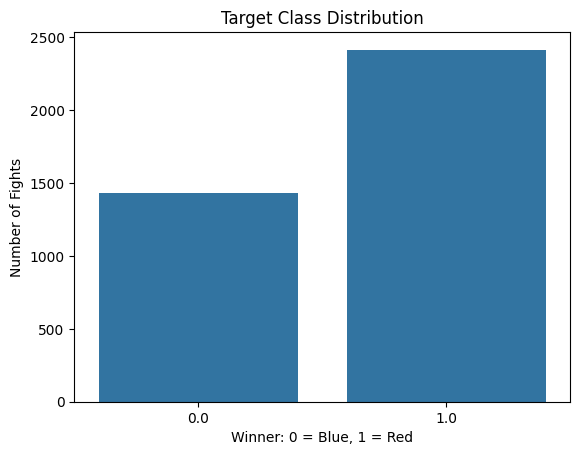

Class proportions:
Target
1.0    0.627339
0.0    0.372661
Name: proportion, dtype: float64


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# 📊 Let's visualize the distribution of target classes (Red vs. Blue wins)
# This helps us understand if our dataset is imbalanced — and it is!
sns.countplot(x=y)
plt.title("Target Class Distribution")
plt.xlabel("Winner: 0 = Blue, 1 = Red")
plt.ylabel("Number of Fights")
plt.show()

# 🧮 Also print the proportion of each class
print("Class proportions:")
print(y.value_counts(normalize=True))


In [12]:
# 📊 STEP 1: Define the stat keys we want to blend
# These include striking, grappling, and positional control metrics
stat_keys = [
    "KD", "SIG_STR_att", "SIG_STR_landed", "SIG_STR_pct", "TOTAL_STR_att", "TOTAL_STR_landed",
    "TD_att", "TD_landed", "TD_pct", "SUB_ATT", "PASS", "REV",
    "HEAD_att", "HEAD_landed", "BODY_att", "BODY_landed",
    "CLINCH_att", "CLINCH_landed", "GROUND_att", "GROUND_landed"
]

# 🧪 STEP 2: Create a new DataFrame to hold expected (blended) features
blended_df = pd.DataFrame()

# 🔁 STEP 3: For each stat, estimate expected performance
# Idea: expected = average of fighter's own stat and opponent's allowed stat
for stat in stat_keys:
    r_col = f"R_avg_{stat}"        # Red fighter's stat
    b_opp_col = f"B_avg_opp_{stat}"  # Blue fighter's defense against this stat
    b_col = f"B_avg_{stat}"        # Blue fighter's stat
    r_opp_col = f"R_avg_opp_{stat}"  # Red fighter's defense against this stat

    # Compute Red expected stat: how well Red might do vs Blue, based on averages
    if r_col in df.columns and b_opp_col in df.columns:
        blended_df[f"R_exp_{stat}"] = (df[r_col] + df[b_opp_col]) / 2

    # Compute Blue expected stat
    if b_col in df.columns and r_opp_col in df.columns:
        blended_df[f"B_exp_{stat}"] = (df[b_col] + df[r_opp_col]) / 2

# 🏷️ STEP 4: Add the binary target column for modeling
# Red win = 1, Blue win = 0
blended_df["Winner"] = df["Winner"].map({"Red": 1, "Blue": 0})

# 👀 Preview the engineered dataset
blended_df.head()


,R_exp_KD,B_exp_KD,R_exp_SIG_STR_att,B_exp_SIG_STR_att,R_exp_SIG_STR_landed,B_exp_SIG_STR_landed,R_exp_SIG_STR_pct,B_exp_SIG_STR_pct,R_exp_TOTAL_STR_att,B_exp_TOTAL_STR_att,...,B_exp_BODY_landed,R_exp_CLINCH_att,B_exp_CLINCH_att,R_exp_CLINCH_landed,B_exp_CLINCH_landed,R_exp_GROUND_att,B_exp_GROUND_att,R_exp_GROUND_landed,B_exp_GROUND_landed,Winner
0,0.500000,0.000000,59.000000,31.500000,31.000000,13.000000,0.497500,0.440000,74.500000,46.250000,...,4.000000,2.500000,5.7500,2.000000,2.250000,18.250000,2.250000,12.250000,1.500000,1.0
1,0.515625,0.281250,63.781250,67.328125,29.828125,31.296875,0.440937,0.520625,80.812500,105.921875,...,7.078125,3.734375,2.7500,2.078125,2.312500,6.890625,3.921875,4.781250,2.421875,1.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,0.000000,0.062988,79.978027,129.017090,36.399902,71.246094,0.490913,0.545293,105.764648,171.468262,...,28.922852,16.154297,37.1875,12.360352,30.436035,4.869629,21.591797,3.117188,11.070312,0.0


In [13]:
# 🧹 Remove rows with any missing values
# This ensures that the model only sees complete records with no NaNs in any feature
blended_df_clean = blended_df.dropna()


In [14]:
from sklearn.model_selection import train_test_split

# 🧠 Split features and target
# X = all blended (engineered) stats
# y = binary target (1 = Red wins, 0 = Blue wins)
X = blended_df_clean.drop("Winner", axis=1)
y = blended_df_clean["Winner"]

# 🧪 Split the dataset into training and testing sets
# 75% for training, 25% for testing — a common choice
# random_state=42 ensures reproducibility
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# 🤖 STEP 1: Initialize Logistic Regression model
# - max_iter=1000 ensures convergence even if data is complex
model = LogisticRegression(max_iter=1000)

# 🏋️‍♂️ STEP 2: Train the model on the training data
model.fit(X_train, y_train)

# 🔮 STEP 3: Predict outcomes on the test set
y_pred = model.predict(X_test)

# 📊 STEP 4: Evaluate performance
# - Accuracy is the simplest metric
# - Classification report includes precision, recall, F1
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.6427898209236569
              precision    recall  f1-score   support

         0.0       0.53      0.19      0.28       388
         1.0       0.66      0.90      0.76       673

    accuracy                           0.64      1061
   macro avg       0.60      0.55      0.52      1061
weighted avg       0.61      0.64      0.59      1061



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
# 📊 Reuse expected stat features if not already created
# (This assumes `blended_df` is already created in earlier steps)

# ➕ Add additional engineered features that compare fighter attributes
blended_df["age_diff"] = df["R_age"] - df["B_age"]
blended_df["reach_diff"] = df["R_Reach_cms"] - df["B_Reach_cms"]
blended_df["height_diff"] = df["R_Height_cms"] - df["B_Height_cms"]
blended_df["win_streak_diff"] = df["R_current_win_streak"] - df["B_current_win_streak"]
blended_df["lose_streak_diff"] = df["R_current_lose_streak"] - df["B_current_lose_streak"]

# 🧹 Remove rows with any missing values
blended_df_clean = blended_df.dropna()

# 🧠 Split features and target
from sklearn.model_selection import train_test_split

X = blended_df_clean.drop("Winner", axis=1)
y = blended_df_clean["Winner"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [17]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# 🌲 Train Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# ⚡ Train XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

# 📊 Evaluate both models
rf_accuracy = accuracy_score(y_test, rf_pred)
xgb_accuracy = accuracy_score(y_test, xgb_pred)

print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print(classification_report(y_test, rf_pred))

print(f"XGBoost Accuracy: {xgb_accuracy:.4f}")
print(classification_report(y_test, xgb_pred))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:41:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Random Forest Accuracy: 0.6320
              precision    recall  f1-score   support

         0.0       0.53      0.26      0.34       363
         1.0       0.66      0.86      0.74       599

    accuracy                           0.63       962
   macro avg       0.59      0.56      0.54       962
weighted avg       0.61      0.63      0.59       962

XGBoost Accuracy: 0.6320
              precision    recall  f1-score   support

         0.0       0.52      0.37      0.43       363
         1.0       0.67      0.79      0.73       599

    accuracy                           0.63       962
   macro avg       0.60      0.58      0.58       962
weighted avg       0.61      0.63      0.62       962



In [ ]:
from sklearn.model_selection import train_test_split

# 🧠 Split features and target
# X = all blended (engineered) stats
# y = binary target (1 = Red wins, 0 = Blue wins)
X = blended_df_clean.drop("Winner", axis=1)
y = blended_df_clean["Winner"]

# 🧪 Split the dataset into training and testing sets
# 75% for training, 25% for testing — a common choice
# random_state=42 ensures reproducibility
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)


<Figure size 1200x600 with 0 Axes>

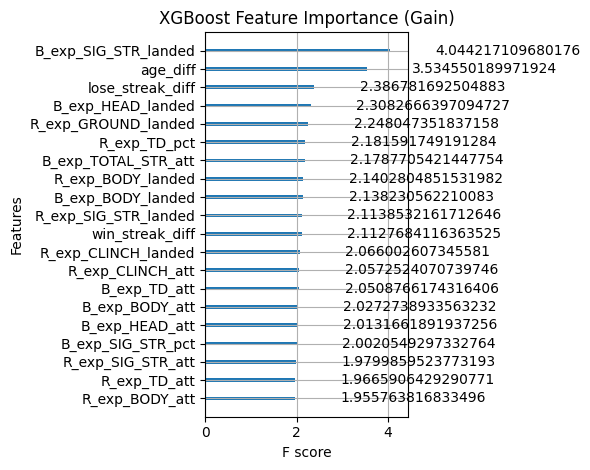

In [19]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

# 🔥 Let's visualize which features were most influential in the XGBoost model.
# I used 'gain' as the importance metric — it tells us how much each feature helps improve model performance.
plt.figure(figsize=(12, 6))
plot_importance(xgb_model, max_num_features=20, importance_type='gain')
plt.title("XGBoost Feature Importance (Gain)")
plt.tight_layout()
plt.show()




In [20]:
from sklearn.ensemble import RandomForestClassifier

# ⚖️ Training a class-balanced Random Forest model.
# This helps the model treat minority classes (like Blue wins) more seriously by adjusting the sample weights.
rf_model_balanced = RandomForestClassifier(
    class_weight='balanced',  # auto-balances classes
    random_state=42
)

# 🚂 Fit the model
rf_model_balanced.fit(X_train, y_train)

# 🔮 Predict on the test set
rf_pred_balanced = rf_model_balanced.predict(X_test)


In [21]:
# Calculate class ratio
negative = sum(y_train == 0)
positive = sum(y_train == 1)
scale_ratio = negative / positive


In [22]:
from xgboost import XGBClassifier

# ⚖️ Balanced XGBoost model using scale_pos_weight.
# This tells the model: "Blue wins are rare — give them more weight during training."
# scale_ratio is usually calculated as (number of negatives / number of positives)
xgb_model_balanced = XGBClassifier(
    scale_pos_weight=scale_ratio,
    eval_metric='logloss',
    random_state=42
)

# 🚂 Train the model
xgb_model_balanced.fit(X_train, y_train)

# 🔮 Predict outcomes
xgb_pred_balanced = xgb_model_balanced.predict(X_test)


In [23]:
from sklearn.metrics import accuracy_score, classification_report

# ✅ Evaluate Balanced Random Forest
print("🔍 Balanced Random Forest Results")
print("Accuracy:", accuracy_score(y_test, rf_pred_balanced))
print(classification_report(y_test, rf_pred_balanced))

# ✅ Evaluate Balanced XGBoost
print("\n🔍 Balanced XGBoost Results")
print("Accuracy:", accuracy_score(y_test, xgb_pred_balanced))
print(classification_report(y_test, xgb_pred_balanced))



🔍 Balanced Random Forest Results
Accuracy: 0.6465696465696466
              precision    recall  f1-score   support

         0.0       0.57      0.25      0.34       363
         1.0       0.66      0.89      0.76       599

    accuracy                           0.65       962
   macro avg       0.62      0.57      0.55       962
weighted avg       0.63      0.65      0.60       962


🔍 Balanced XGBoost Results
Accuracy: 0.6288981288981289
              precision    recall  f1-score   support

         0.0       0.51      0.43      0.47       363
         1.0       0.69      0.75      0.72       599

    accuracy                           0.63       962
   macro avg       0.60      0.59      0.59       962
weighted avg       0.62      0.63      0.62       962

